**Using CVLIB library**

Trained model saved to emotion_detection_model.pkl


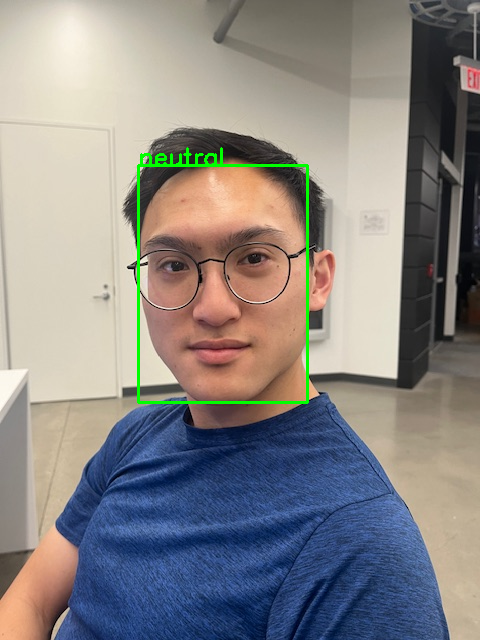

In [ ]:
!pip install cvlib

import cv2
import cvlib as cv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow

# Function to generate synthetic dataset
def generate_synthetic_data(num_samples=1000):
    np.random.seed(42)
    emotions = ['happy', 'sad', 'angry', 'neutral']
    data = {'image': [], 'emotion': []}

    for _ in range(num_samples):
        # Generate random synthetic image data (replace this with your actual image data loading)
        image_data = np.random.rand(100, 100, 3) * 255  # Example random image
        emotion = np.random.choice(emotions)
        data['image'].append(image_data)
        data['emotion'].append(emotion)

    df = pd.DataFrame(data)
    return df

# Generate synthetic training data
train_data = generate_synthetic_data()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data['image'], train_data['emotion'], test_size=0.2, random_state=42)

# Build a simple pipeline with a classifier
model = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100))  # Use RandomForestClassifier for image data
])

# Flatten the images for training
X_train_flat = [img.flatten() for img in X_train]

# Train the model
model.fit(X_train_flat, y_train)

# Save the trained model
model_filename = 'emotion_detection_model.pkl'
joblib.dump(model, model_filename)
print(f"Trained model saved to {model_filename}")

# Load the trained model
loaded_model = joblib.load(model_filename)

# Load an image from Google Drive (replace this with your image path)
image_path = "/content/IMG_4983.JPG"
image = cv2.imread(image_path)

# Detect faces in the image
faces, confidences = cv.detect_face(image)

# Loop through detected faces
for face, confidence in zip(faces, confidences):
    (start_x, start_y, end_x, end_y) = face

    # Crop the face from the image
    face_crop = image[start_y:end_y, start_x:end_x]

    # Resize the face for prediction (adjust the size as needed)
    face_resize = cv2.resize(face_crop, (100, 100))

    # Flatten the face image for prediction
    face_flat = face_resize.flatten()

    # Perform emotion prediction
    emotion = loaded_model.predict([face_flat])[0]

    # Draw bounding box and label on the image
    label = f'{emotion}'
    cv2.rectangle(image, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)
    cv2.putText(image, label, (start_x, start_y ), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Display the resulting image
cv2_imshow(image)



**Using DeepFace Library**

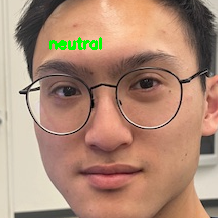

In [ ]:
!pip install DeepFace
import cv2
from deepface import DeepFace

# Provide the correct path to the image file
image_path = "/content/diverse-people-different-emotions-collage-multi-ethnic-mixed-age-range-expressing-55809901.jpeg"
image = cv2.imread(image_path)

# Check if the image is loaded properly
if image is None:
    print("Error: Image not found or could not be loaded.")
else:
    # Detect faces in the image and extract facial area
    faces = DeepFace.extract_faces(image, detector_backend='opencv')

    # Check if faces are detected
    if isinstance(faces, list) and len(faces) > 0:
        # Loop through detected faces
        for face_info in faces:
            # Extract facial area coordinates
            x, y, w, h = face_info['facial_area']['x'], face_info['facial_area']['y'], face_info['facial_area']['w'], face_info['facial_area']['h']

            # Crop the face from the image
            face_crop = image[y:y+h, x:x+w]

            # Perform emotion prediction
            results = DeepFace.analyze(face_crop, actions=['emotion'],enforce_detection=False)

            # Iterate over each result in the list
            for result in results:
                # Get the dominant emotion
                emotion = max(result['emotion'], key=result['emotion'].get)

                # Display the cropped face with emotion label
                cv2.putText(face_crop, f"{emotion}", (48,48), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                cv2_imshow(face_crop)

